# Packages

In [30]:
import pandas as pd
import seaborn as sns
import numpy as np
from datetime import datetime
import gdown
import plotly.express as px
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

# Loading and preparing data

In [31]:
gdown.download(id="122b3O7GoH2pouBcx411M1h0qegZytNpo")

In [32]:
df = pd.read_csv("../assets/teste_indicium_precificacao.csv")

Antes de fazermos o EDA, é importante já separarmos qual será nossa amostra de treino e teste. Para os dados de teste não enviezarem o EDA e consequentemente, o modelo preditivo

In [33]:
X = df.drop("price", axis=1)
y = df.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
df_train = pd.concat([X_train, y_train], axis=1)

# EDA

## Limpeza e pré-processamento dos dados

Um bom ponto de partida antes de começar a ver as características entre as variáveis é ver sua tabela e o tipo de suas colunas

In [35]:
df_train

id                                               nome    host_id  \
38522  30311099  PRIVATE ROOM IN COZY SCANDINAVIAN / BROOKLYN HOME  220734035   
21985  17684277                                  Cute Private Room  119737270   
31180  24208760  Gorgeous Upper West Side apt in stellar location!   56905821   
47176  35616292              Nice house 35 min subway to manhattan  257879526   
7275    5345293                     Historic Landmark Neighborhood   27700855   
...         ...                                                ...        ...   
11284   8754560  Manhattan Private Room with a Garden View (Roo...   45913415   
44732  34383611   Spacious Room in a charming brownstone apartment     877452   
38158  30109765    Nice & quiet,clean & neat, all including hostel   95958773   
860      305211                Your Own 2 Br Apt Bedford and Grand    1570170   
15795  12776694                Private Bedroom in the East Village   50533072   

          host_name bairro_group            bairro  latitude  longitude  \
38522         Selma     Brooklyn      Williamsburg  40.70209  -73.94223   
21985        Fattie     Brooklyn          Flatbush  40.63865  -73.95786   
31180  Josh & Carin    Manhattan   Upper West Side  40.77959  -73.97827   
47176        Israel     Brooklyn     East Flatbush  40.65982  -73.93468   
7275          Peter     Brooklyn  Brooklyn Heights  40.69165  -73.99764   
...             ...          ...               ...       ...        ...   
11284       Grisula    Manhattan            Harlem  40.81146  -73.94589   
44732       Rebecca     Brooklyn        Park Slope  40.68182  -73.97954   
38158        Maryna     Brooklyn    Brighton Beach  40.57811  -73.96004   
860        Kristina     Brooklyn      Williamsburg  40.71532  -73.96064   
15795          Kate    Manhattan      East Village  40.72591  -73.97947   

             room_type  minimo_noites  numero_de_reviews ultima_review  \
38522     Private room              3                  0           NaN   
21985     Private room              2                  0           NaN   
31180     Private room              2                 29    2018-11-20   
47176     Private room              2                  0           NaN   
7275   Entire home/apt              2                 62    2019-06-30   
...                ...            ...                ...           ...   
11284     Private room              3                142    2019-07-06   
44732     Private room              5                  0           NaN   
38158      Shared room              1                  0           NaN   
860    Entire home/apt              3                236    2019-06-18   
15795     Private room              1                  3    2016-07-27   

       reviews_por_mes  calculado_host_listings_count  disponibilidade_365  \
38522              NaN                              1                    0   
21985              NaN                              2                    0   
31180             1.96                              1                    0   
47176              NaN                              2                  336   
7275              1.19                              1                  274   
...                ...                            ...                  ...   
11284             3.12                              2                  210   
44732              NaN                              1                    0   
38158              NaN                              3                  365   
860               2.74                              2                  242   
15795             0.08                              1                    0   

       price  
38522     60  
21985     65  
31180    180  
47176     54  
7275     300  
...      ...  
11284     64  
44732     95  
38158     50  
860      180  
15795     90  

[39115 rows x 16 columns]

In [36]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39115 entries, 38522 to 15795
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             39115 non-null  int64  
 1   nome                           39105 non-null  object 
 2   host_id                        39115 non-null  int64  
 3   host_name                      39096 non-null  object 
 4   bairro_group                   39115 non-null  object 
 5   bairro                         39115 non-null  object 
 6   latitude                       39115 non-null  float64
 7   longitude                      39115 non-null  float64
 8   room_type                      39115 non-null  object 
 9   minimo_noites                  39115 non-null  int64  
 10  numero_de_reviews              39115 non-null  int64  
 11  ultima_review                  31045 non-null  object 
 12  reviews_por_mes                31045 non-null  

In [37]:
df_train.describe()

id       host_id      latitude     longitude  minimo_noites  \
count  3.911500e+04  3.911500e+04  39115.000000  39115.000000   39115.000000   
mean   1.901947e+07  6.733938e+07     40.729083    -73.952374       7.027688   
std    1.097931e+07  7.847529e+07      0.054470      0.045882      19.988102   
min    2.595000e+03  2.787000e+03     40.499790    -74.242850       1.000000   
25%    9.462978e+06  7.757268e+06     40.690265    -73.983145       1.000000   
50%    1.966076e+07  3.064114e+07     40.723470    -73.955730       3.000000   
75%    2.916791e+07  1.074344e+08     40.763220    -73.936490       5.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990    1000.000000   

       numero_de_reviews  reviews_por_mes  calculado_host_listings_count  \
count       39115.000000     31045.000000                   39115.000000   
mean           23.260233         1.373628                       7.110827   
std            44.427104         1.685673                      32.765293   
min             0.000000         0.010000                       1.000000   
25%             1.000000         0.190000                       1.000000   
50%             5.000000         0.710000                       1.000000   
75%            24.000000         2.030000                       2.000000   
max           629.000000        58.500000                     327.000000   

       disponibilidade_365         price  
count         39115.000000  39115.000000  
mean            112.931254    153.765486  
std             131.732250    244.155955  
min               0.000000      0.000000  
25%               0.000000     69.000000  
50%              45.000000    106.000000  
75%             227.000000    176.000000  
max             365.000000  10000.000000

Epa, pera ai! 10 mil reais em uma diária? 0 em um diária? E a média da diária está em 153 dólares! Há algo de errado...

In [38]:
df_train[df_train['price']==0]

id                                               nome    host_id  \
26840  21291569  Coliving in Brooklyn! Modern design / Shared room  101970559   
25777  20624541      Modern apartment in the heart of Williamsburg   10132166   
25795  20639914       Cozy yet spacious private brownstone bedroom   86327101   
25432  20333471      ★Hostel Style Room | Ideal Traveling Buddies★  131697576   
25794  20639792  Contemporary bedroom in brownstone with nice view   86327101   
25793  20639628  Spacious comfortable master bedroom with nice ...   86327101   
23160  18750597  Huge Brooklyn Brownstone Living, Close to it all.    8993084   
25752  20608117                    Sunny, Quiet Room in Greenpoint    1641537   
26258  20933849                              the best you can find   13709292   

      host_name bairro_group              bairro  latitude  longitude  \
26840    Sergii     Brooklyn            Bushwick  40.69211  -73.90670   
25777   Aymeric     Brooklyn        Williamsburg  40.70838  -73.94645   
25795   Adeyemi     Brooklyn  Bedford-Stuyvesant  40.68258  -73.91284   
25432    Anisha        Bronx     East Morrisania  40.83296  -73.88668   
25794   Adeyemi     Brooklyn  Bedford-Stuyvesant  40.68279  -73.91170   
25793   Adeyemi     Brooklyn  Bedford-Stuyvesant  40.68173  -73.91342   
23160  Kimberly     Brooklyn  Bedford-Stuyvesant  40.69023  -73.95428   
25752    Lauren     Brooklyn          Greenpoint  40.72462  -73.94072   
26258    Qiuchi    Manhattan         Murray Hill  40.75091  -73.97597   

             room_type  minimo_noites  numero_de_reviews ultima_review  \
26840      Shared room             30                  2    2019-06-22   
25777  Entire home/apt              5                  3    2018-01-02   
25795     Private room              1                 95    2019-06-23   
25432     Private room              2                 55    2019-06-24   
25794     Private room              1                 95    2019-06-21   
25793     Private room              1                 93    2019-06-15   
23160     Private room              4                  1    2018-01-06   
25752     Private room              2                 12    2017-10-27   
26258  Entire home/apt              3                  0           NaN   

       reviews_por_mes  calculado_host_listings_count  disponibilidade_365  \
26840             0.11                              6                  333   
25777             0.15                              1                   73   
25795             4.35                              6                  222   
25432             2.56                              4                  127   
25794             4.37                              6                  232   
25793             4.28                              6                  176   
23160             0.05                              4                   28   
25752             0.53                              2                    0   
26258              NaN                              1                    0   

       price  
26840      0  
25777      0  
25795      0  
25432      0  
25794      0  
25793      0  
23160      0  
25752      0  
26258      0

In [39]:
df_train[df_train['price'] > 9000]

id                                               nome   host_id  \
9150    7003697                Furnished room in Astoria apartment  20582832   
29237  22436899                                1-BR Lincoln Center  72390391   
17691  13894339    Luxury 1 bedroom apt. -stunning Manhattan views   5143901   
40432  31340283  2br - The Heart of NYC: Manhattans Lower East ...   4382127   

      host_name bairro_group           bairro  latitude  longitude  \
9150   Kathrine       Queens          Astoria  40.76810  -73.91651   
29237    Jelena    Manhattan  Upper West Side  40.77213  -73.98665   
17691      Erin     Brooklyn       Greenpoint  40.73260  -73.95739   
40432      Matt    Manhattan  Lower East Side  40.71980  -73.98566   

             room_type  minimo_noites  numero_de_reviews ultima_review  \
9150      Private room            100                  2    2016-02-13   
29237  Entire home/apt             30                  0           NaN   
17691  Entire home/apt              5                  5    2017-07-27   
40432  Entire home/apt             30                  0           NaN   

       reviews_por_mes  calculado_host_listings_count  disponibilidade_365  \
9150              0.04                              1                    0   
29237              NaN                              1                   83   
17691             0.16                              1                    0   
40432              NaN                              1                  365   

       price  
9150   10000  
29237  10000  
17691  10000  
40432   9999

Aha! Apenas 4 imóveis valendo acima de 9000... E poquissimos imóveis cuja diária é superior a 1000... faz sentido a média estar em torno de 153...

É necessário fazer algo a respeito. 
A minha decisão será selecionar apenas apartamentos cujo preço é, aproximadamente, no máximo duas vezes à média (300 dólares a diária). Fora isso, irei considerar como outlier e que seria um preço absurdo de diária. Além disso, percebe-se que apenas 2726 apartamentos serão excluidos, de um total de 39115. Removendo assim, 30% dos dados. Após um maior entendimento e aplicação dos modelos preditivos, esse valor pode ser reconsiderado.

Os preços nulos serão removidos também

Faremos uma cópia do dataframe. Tanto para guardar o dataframe antigo caso a gente quiera utiliza-lo quanto para fazermos transformações.


### Remoção de valores considerados outliers

In [40]:
df_train_pp = df_train.copy()
df_train_pp = df_train_pp[(df_train_pp['price'] > 0) & (df_train_pp['price'] <= 300)]


In [41]:
df_train.describe()

id       host_id      latitude     longitude  minimo_noites  \
count  3.911500e+04  3.911500e+04  39115.000000  39115.000000   39115.000000   
mean   1.901947e+07  6.733938e+07     40.729083    -73.952374       7.027688   
std    1.097931e+07  7.847529e+07      0.054470      0.045882      19.988102   
min    2.595000e+03  2.787000e+03     40.499790    -74.242850       1.000000   
25%    9.462978e+06  7.757268e+06     40.690265    -73.983145       1.000000   
50%    1.966076e+07  3.064114e+07     40.723470    -73.955730       3.000000   
75%    2.916791e+07  1.074344e+08     40.763220    -73.936490       5.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990    1000.000000   

       numero_de_reviews  reviews_por_mes  calculado_host_listings_count  \
count       39115.000000     31045.000000                   39115.000000   
mean           23.260233         1.373628                       7.110827   
std            44.427104         1.685673                      32.765293   
min             0.000000         0.010000                       1.000000   
25%             1.000000         0.190000                       1.000000   
50%             5.000000         0.710000                       1.000000   
75%            24.000000         2.030000                       2.000000   
max           629.000000        58.500000                     327.000000   

       disponibilidade_365         price  
count         39115.000000  39115.000000  
mean            112.931254    153.765486  
std             131.732250    244.155955  
min               0.000000      0.000000  
25%               0.000000     69.000000  
50%              45.000000    106.000000  
75%             227.000000    176.000000  
max             365.000000  10000.000000

Um próximo passo interessante para ver as características entre as variáveis é fazer a correlação entre elas. Mas antes disso, percebe-se pelas tabelas anteriores que:
1. Muitas variaveis são textuais. E muitas delas podem ser transformadas em colunas numéricas e podem ser úteis para a correlação
2. Existem dados nulos
3. As colunas numéricas possuem escalas numéricas diferentes

### Conversão de coluncas textuais em numéricas

In [42]:
df_train_pp = pd.get_dummies(df_train_pp, columns=['bairro_group'], prefix=['bairro_group_type'], dtype=int)
df_train_pp = pd.get_dummies(df_train_pp, columns=['room_type'], prefix=['room_type_type'], dtype=int)
df_train_pp

id                                               nome    host_id  \
38522  30311099  PRIVATE ROOM IN COZY SCANDINAVIAN / BROOKLYN HOME  220734035   
21985  17684277                                  Cute Private Room  119737270   
31180  24208760  Gorgeous Upper West Side apt in stellar location!   56905821   
47176  35616292              Nice house 35 min subway to manhattan  257879526   
7275    5345293                     Historic Landmark Neighborhood   27700855   
...         ...                                                ...        ...   
11284   8754560  Manhattan Private Room with a Garden View (Roo...   45913415   
44732  34383611   Spacious Room in a charming brownstone apartment     877452   
38158  30109765    Nice & quiet,clean & neat, all including hostel   95958773   
860      305211                Your Own 2 Br Apt Bedford and Grand    1570170   
15795  12776694                Private Bedroom in the East Village   50533072   

          host_name            bairro  latitude  longitude  minimo_noites  \
38522         Selma      Williamsburg  40.70209  -73.94223              3   
21985        Fattie          Flatbush  40.63865  -73.95786              2   
31180  Josh & Carin   Upper West Side  40.77959  -73.97827              2   
47176        Israel     East Flatbush  40.65982  -73.93468              2   
7275          Peter  Brooklyn Heights  40.69165  -73.99764              2   
...             ...               ...       ...        ...            ...   
11284       Grisula            Harlem  40.81146  -73.94589              3   
44732       Rebecca        Park Slope  40.68182  -73.97954              5   
38158        Maryna    Brighton Beach  40.57811  -73.96004              1   
860        Kristina      Williamsburg  40.71532  -73.96064              3   
15795          Kate      East Village  40.72591  -73.97947              1   

       numero_de_reviews ultima_review  ...  disponibilidade_365  price  \
38522                  0           NaN  ...                    0     60   
21985                  0           NaN  ...                    0     65   
31180                 29    2018-11-20  ...                    0    180   
47176                  0           NaN  ...                  336     54   
7275                  62    2019-06-30  ...                  274    300   
...                  ...           ...  ...                  ...    ...   
11284                142    2019-07-06  ...                  210     64   
44732                  0           NaN  ...                    0     95   
38158                  0           NaN  ...                  365     50   
860                  236    2019-06-18  ...                  242    180   
15795                  3    2016-07-27  ...                    0     90   

       bairro_group_type_Bronx  bairro_group_type_Brooklyn  \
38522                        0                           1   
21985                        0                           1   
31180                        0                           0   
47176                        0                           1   
7275                         0                           1   
...                        ...                         ...   
11284                        0                           0   
44732                        0                           1   
38158                        0                           1   
860                          0                           1   
15795                        0                           0   

       bairro_group_type_Manhattan  bairro_group_type_Queens  \
38522                            0                         0   
21985                            0                         0   
31180                            1                         0   
47176                            0                         0   
7275                             0                         0   
...                            ...                       ...   
11284                

In [43]:
df_train_pp.loc[:, 'ultima_review_timestamp'] = df_train_pp['ultima_review'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').timestamp() if pd.notnull(x) else None)

A coluna room_type foi transformada em 3 colunas booleanas
A coluna bairro_group foi transformada em 5 colunas booleanas
A coluna ultima_review foi transformada em 1 coluna numérica do tipo timestamp. Quanto maior o valor do timestamp, mais recente é a review 

### Remover de dados com campos nulos

In [44]:
df_train_pp = df_train_pp.dropna()
df_train_pp

id                                               nome   host_id  \
31180  24208760  Gorgeous Upper West Side apt in stellar location!  56905821   
7275    5345293                     Historic Landmark Neighborhood  27700855   
22939  18584180   CHARMING CHELSEA BROWNSTONE STUDIO NEAR HIGHLINE  21866971   
31364  24372429      Spacious, Charming 2BR Apt in Trendy Bushwick  10197436   
19902  15952950                             Spacious Bushwick Loft  58503744   
...         ...                                                ...       ...   
16850  13431552                          Lincoln Center Area 1 Bed   3191545   
6265    4576821                Charming apt. in Brooklyn, New York   4362140   
11284   8754560  Manhattan Private Room with a Garden View (Roo...  45913415   
860      305211                Your Own 2 Br Apt Bedford and Grand   1570170   
15795  12776694                Private Bedroom in the East Village  50533072   

          host_name              bairro  latitude  longitude  minimo_noites  \
31180  Josh & Carin     Upper West Side  40.77959  -73.97827              2   
7275          Peter    Brooklyn Heights  40.69165  -73.99764              2   
22939           Ben             Chelsea  40.74530  -74.00002              3   
31364         Chris            Bushwick  40.68652  -73.91212              2   
19902        Rachel            Bushwick  40.69505  -73.90729              4   
...             ...                 ...       ...        ...            ...   
16850          Kyle      Hell's Kitchen  40.75833  -73.99019             30   
6265          María  Bedford-Stuyvesant  40.68798  -73.95678              3   
11284       Grisula              Harlem  40.81146  -73.94589              3   
860        Kristina        Williamsburg  40.71532  -73.96064              3   
15795          Kate        East Village  40.72591  -73.97947              1   

       numero_de_reviews ultima_review  ...  price  bairro_group_type_Bronx  \
31180                 29    2018-11-20  ...    180                        0   
7275                  62    2019-06-30  ...    300                        0   
22939                 24    2019-06-08  ...    180                        0   
31364                 71    2019-07-06  ...     99                        0   
19902                  4    2018-06-14  ...     65                        0   
...                  ...           ...  ...    ...                      ...   
16850                  2    2017-06-18  ...    229                        0   
6265                  11    2015-09-22  ...    140                        0   
11284                142    2019-07-06  ...     64                        0   
860                  236    2019-06-18  ...    180                        0   
15795                  3    2016-07-27  ...     90                        0   

       bairro_group_type_Brooklyn  bairro_group_type_Manhattan  \
31180                           0                            1   
7275                            1                            0   
22939                           0                            1   
31364                           1                            0   
19902                           1                            0   
...                           ...                          ...   
16850                           0                            1   
6265                            1                            0   
11284                           0                            1   
860                             1                            0   
15795                           0                            1   

       bairro_group_type_Queens  bairro_group_type_Staten Island  \
31180                         0                                0   
7275                          0                                0   
22939                         0                                0   
31364                         0                                0   
19902                

### Padronizar escalas numéricas das colunas

In [45]:
df_for_corr = df_train_pp.select_dtypes(exclude=["object"])
df_for_corr = df_for_corr.astype('float')
df_for_corr = df_for_corr.iloc[:, 2:]
columns = df_for_corr.columns
mms = MinMaxScaler()
df_for_corr = mms.fit_transform(df_for_corr)
df_for_corr = pd.DataFrame(df_for_corr, columns=columns)
df_for_corr

latitude  longitude  minimo_noites  numero_de_reviews  reviews_por_mes  \
0      0.671782   0.495809       0.001002           0.044586         0.033339   
1      0.455527   0.458995       0.001002           0.097134         0.020174   
2      0.587459   0.454471       0.002004           0.036624         0.018978   
3      0.442912   0.621534       0.001002           0.111465         0.081894   
4      0.463888   0.630714       0.003006           0.004777         0.001881   
...         ...        ...            ...                ...              ...   
29259  0.619501   0.473154       0.029058           0.001592         0.001197   
29260  0.446502   0.536653       0.002004           0.015924         0.003248   
29261  0.750154   0.557351       0.002004           0.224522         0.053171   
29262  0.513734   0.529317       0.002004           0.374204         0.046675   
29263  0.539776   0.493528       0.000000           0.003185         0.001197   

       calculado_host_listings_count  disponibilidade_365     price  \
0                           0.000000             0.000000  0.586207   
1                           0.000000             0.750685  1.000000   
2                           0.000000             0.038356  0.586207   
3                           0.000000             0.383562  0.306897   
4                           0.000000             0.000000  0.189655   
...                              ...                  ...       ...   
29259                       0.067485             0.000000  0.755172   
29260                       0.000000             0.000000  0.448276   
29261                       0.003067             0.575342  0.186207   
29262                       0.003067             0.663014  0.586207   
29263                       0.000000             0.000000  0.275862   

       bairro_group_type_Bronx  bairro_group_type_Brooklyn  \
0                          0.0                         0.0   
1                          0.0                         1.0   
2                          0.0                         0.0   
3                          0.0                         1.0   
4                          0.0                         1.0   
...                        ...                         ...   
29259                      0.0                         0.0   
29260                      0.0                         1.0   
29261                      0.0                         0.0   
29262                      0.0                         1.0   
29263                      0.0                         0.0   

       bairro_group_type_Manhattan  bairro_group_type_Queens  \
0                              1.0                       0.0   
1                              0.0                       0.0   
2                              1.0                       0.0   
3                              0.0                       0.0   
4                              0.0                       0.0   
...                            ...                       ...   
29259                          1.0                       0.0   
29260                          0.0                       0.0   
29261                          1.0                       0.0   
29262                          0.0                       0.0   
29263                          1.0                       0.0   

       bairro_group_type_Staten Island  room_type_type_Entire home/apt  \
0                                  0.0                             0.0   
1                                  0.0                             1.0   
2                                  0.0                             1.0   
3                                  0.0                             1.0   
4                                  0.0                             0.0   
...                                ...                             ...   
29259                              0.0                             1.0   
29260                              0.0                             1.0   
2

## Características entre as variáveis

Agora sim podemos começar a ver as características entre as variáveis

### Correlação

Para isso, vamos aplicar uma correlação, selecionando apenas as colunas numéricas do dataset processado

In [46]:
df_corr = df_for_corr.corr()
df_corr

latitude  longitude  minimo_noites  \
latitude                         1.000000   0.092086       0.026885   
longitude                        0.092086   1.000000      -0.059325   
minimo_noites                    0.026885  -0.059325       1.000000   
numero_de_reviews               -0.006486   0.058326      -0.075359   
reviews_por_mes                 -0.009819   0.155053      -0.128727   
calculado_host_listings_count    0.008167  -0.087251       0.087135   
disponibilidade_365             -0.024284   0.120557       0.110180   
price                            0.060928  -0.302321       0.021162   
bairro_group_type_Bronx          0.333427   0.217895      -0.021125   
bairro_group_type_Brooklyn      -0.678428  -0.012147      -0.028032   
bairro_group_type_Manhattan      0.597859  -0.412476       0.062249   
bairro_group_type_Queens         0.025763   0.622517      -0.037570   
bairro_group_type_Staten Island -0.192690  -0.304686      -0.014086   
room_type_type_Entire home/apt  -0.023723  -0.162502       0.085804   
room_type_type_Private room      0.021424   0.155267      -0.081173   
room_type_type_Shared room       0.007709   0.024586      -0.015666   
ultima_review_timestamp         -0.022366   0.110045      -0.042234   

                                 numero_de_reviews  reviews_por_mes  \
latitude                                 -0.006486        -0.009819   
longitude                                 0.058326         0.155053   
minimo_noites                            -0.075359        -0.128727   
numero_de_reviews                         1.000000         0.556531   
reviews_por_mes                           0.556531         1.000000   
calculado_host_listings_count            -0.058023        -0.015499   
disponibilidade_365                       0.204036         0.192533   
price                                    -0.020119        -0.039335   
bairro_group_type_Bronx                   0.012072         0.047584   
bairro_group_type_Brooklyn                0.001337        -0.042713   
bairro_group_type_Manhattan              -0.035355        -0.061184   
bairro_group_type_Queens                  0.041975         0.127383   
bairro_group_type_Staten Island           0.012942         0.025938   
room_type_type_Entire home/apt           -0.014347        -0.044133   
room_type_type_Private room               0.021343         0.042482   
room_type_type_Shared room               -0.023121         0.005637   
ultima_review_timestamp                   0.288421         0.441089   

                                 calculado_host_listings_count  \
latitude                                              0.008167   
longitude                                            -0.087251   
minimo_noites                                         0.087135   
numero_de_reviews                                    -0.058023   
reviews_por_mes                                      -0.015499   
calculado_host_listings_count                         1.000000   
disponibilidade_365                                   0.187788   
price                                                 0.122005   
bairro_group_type_Bronx                              -0.016619   
bairro_group_type_Brooklyn                           -0.092264   
bairro_group_type_Manhattan                           0.115551   
bairro_group_type_Queens                             -0.024136   
bairro_group_type_Staten Island                      -0.008988   
room_type_type_Entire home/apt                        0.072875   
room_type_type_Private room                          -0.072937   
room_type_type_Shared room                           -0.000070   
ultima_review_timestamp                               0.050408   

                                 disponibilidade_365     price  \
latitude                                   -0.024284  0.060928   
longitude                                   0.120557 -0.302321   
minimo_noites                               0.110180  0.021162   
numero_de_reviews     

OBS: Nessa análise, será considerada uma correlação pertinente um valor cujo módulo é maior que 0.3
- Percebe-se que o fato do **apartamento ser privado é a característica que mais desvaloriza ao imóvel (0.58)**. Ter uma **longitude menor desvaloriza também (0.30)**
- Percebe-se também que o fato do **aprtamento ser home/apt valoriza muito o imóvel (0.62)** Ademais, **estar em Manhattan também valoriza (0.31**

## Hipóteses de negócio

Se a pessoa quer alugar um imóvel por um preço mais elevado, uma boa seria comprar um apartamento do tipo home/apt e em Manhathan.

Agora vamos levar em consideração a questão de locação com mais rapidez. Ao considerar a hipótese de que apartamentos com mais numero de reviews e reviews por mês são alugados com mais velocidade, podemos gerar a seguinte tabela:

In [47]:
df_corr.loc[df_corr.index.str.contains('bairro')]

latitude  longitude  minimo_noites  \
bairro_group_type_Bronx          0.333427   0.217895      -0.021125   
bairro_group_type_Brooklyn      -0.678428  -0.012147      -0.028032   
bairro_group_type_Manhattan      0.597859  -0.412476       0.062249   
bairro_group_type_Queens         0.025763   0.622517      -0.037570   
bairro_group_type_Staten Island -0.192690  -0.304686      -0.014086   

                                 numero_de_reviews  reviews_por_mes  \
bairro_group_type_Bronx                   0.012072         0.047584   
bairro_group_type_Brooklyn                0.001337        -0.042713   
bairro_group_type_Manhattan              -0.035355        -0.061184   
bairro_group_type_Queens                  0.041975         0.127383   
bairro_group_type_Staten Island           0.012942         0.025938   

                                 calculado_host_listings_count  \
bairro_group_type_Bronx                              -0.016619   
bairro_group_type_Brooklyn                           -0.092264   
bairro_group_type_Manhattan                           0.115551   
bairro_group_type_Queens                             -0.024136   
bairro_group_type_Staten Island                      -0.008988   

                                 disponibilidade_365     price  \
bairro_group_type_Bronx                     0.076811 -0.104338   
bairro_group_type_Brooklyn                 -0.052533 -0.154253   
bairro_group_type_Manhattan                -0.057196  0.309645   
bairro_group_type_Queens                    0.110863 -0.171385   
bairro_group_type_Staten Island             0.068663 -0.046459   

                                 bairro_group_type_Bronx  \
bairro_group_type_Bronx                         1.000000   
bairro_group_type_Brooklyn                     -0.134946   
bairro_group_type_Manhattan                    -0.130559   
bairro_group_type_Queens                       -0.057878   
bairro_group_type_Staten Island                -0.014217   

                                 bairro_group_type_Brooklyn  \
bairro_group_type_Bronx                           -0.134946   
bairro_group_type_Brooklyn                         1.000000   
bairro_group_type_Manhattan                       -0.732869   
bairro_group_type_Queens                          -0.324885   
bairro_group_type_Staten Island                   -0.079806   

                                 bairro_group_type_Manhattan  \
bairro_group_type_Bronx                            -0.130559   
bairro_group_type_Brooklyn                         -0.732869   
bairro_group_type_Manhattan                         1.000000   
bairro_group_type_Queens                           -0.314325   
bairro_group_type_Staten Island                    -0.077212   

                                 bairro_group_type_Queens  \
bairro_group_type_Bronx                         -0.057878   
bairro_group_type_Brooklyn                      -0.324885   
bairro_group_type_Manhattan                     -0.314325   
bairro_group_type_Queens                         1.000000   
bairro_group_type_Staten Island                 -0.034228   

                                 bairro_group_type_Staten Island  \
bairro_group_type_Bronx                                -0.014217   
bairro_group_type_Brooklyn                             -0.079806   
bairro_group_type_Manhattan                            -0.077212   
bairro_group_type_Queens                               -0.034228   
bairro_group_type_Staten Island                         1.000000   

                                 room_type_type_Entire home/apt  \
bairro_group_type_Bronx                               -0.048725   
bairro_group_type_Brooklyn                            -0.034459   
bairro_group_type_Manhattan                            0.114523   
bairro_group_type_Queens                              -0.095084   
bairro_group_type_Staten Island                       -0.009138   

                                 room_type_type_Private room  \
bairro_group_type

Porém, percebe-se que nenhum bairro tem uma correlação significativa quando comparada com 'numero_de_reviews' ou 'reviews_por_mes'. Portanto, pode-se considerar que todos os cinco bairros tem rapidez de locação similar. Logo, segue a hipótese de que um bom apartamento de ser comprado está em Manhathan e é do tipo home/apt, por ser mais valorizado

## Pergunta a) Supondo que uma pessoa esteja pensando em investir em um apartamento para alugar na plataforma, onde seria mais indicada a compra?
Conforme falado na seção de hipótese de negócio, a compra de um apartamento em Manhathan do tipo /home/apt é o mais indicado.

Além disso, percebe-se que existem apartamentos em Manhathan do tipo /lhome/apt perto da praia, conforme mostrado nas duas figuras baixo (a primeira mostra aonde fica o bairro de manhathan e a segunda mostra onde estão localizados os diferentes tipos de apartamentos).

In [48]:
px.scatter(df_train, x='latitude', y='longitude', color='bairro_group', color_continuous_scale='viridis', height=800, width=800)

In [49]:
px.scatter(df_train, x='latitude', y='longitude', color='room_type', color_continuous_scale='viridis', height=800, width=800)

## Pergunta b) O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço? 
R: Muito pouco. 'disponibilidade' possui uma correlação com o preço de 0.03, e 'minimo de noites', 0.02. Sendo, portanto, uma interferência quase desprezível.

## Pergunta c) Existe algum padrão no texto do nome do local para lugares de mais alto valor?
Para responder essa pergunta, decidiu-se fazer uma nuvem de palavras com os textos da coluna 'nome'. Será considerado alto valor um preço acima de 1000 dólares


### Wordclouds

In [61]:
from wordcloud import WordCloud

Text(0.5, 1.0, 'Palavras mais frequentes em nomes de apartamentos acima de 1000')

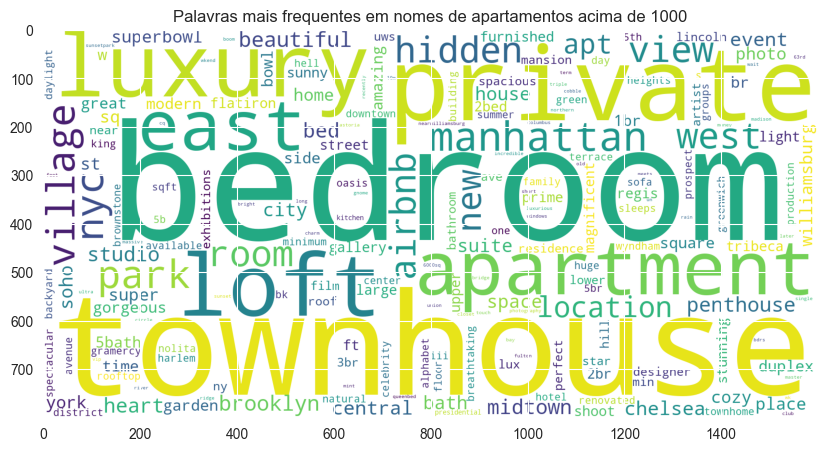

In [62]:
df_train_3000up = df_train.copy()
th = 1000
df_train_3000up = df_train_3000up[df_train_3000up['price'] > th]
text_for_wordcloud = " ".join(str(text) for text in df_train_3000up['nome']).lower()
wordcloud = WordCloud(collocations=False, background_color='white', width=1600, height=800).generate(text_for_wordcloud)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.title(f'Palavras mais frequentes em nomes de apartamentos acima de {th}')

R: Palavras como 'townhouse', 'manhathan', 'apartment' e 'bedroom' estão entre as palavras mais frequentes no nome dos apartamentos acima de 1000 dolares
- 'manhathan' faz sentido pois é um local mto valorizado de NY
- 'apartment' também pois foi visto que apartamentos de tipo 'home/apt' tem mais valor
- 'bedroom' é interessante. Parece que quanto mais quartos, maior o valor do apartamento
- 'townhouse' foi surpresa. Vi que são pequenas cidades com casas parecidas, fazendo memória à casas de séculos anteriores. Interessante terem um valor alto. Possívelmente devido a um interesse da população sair de um local com grandes prédios e arranha-céus para um lugar mais tranquilo. Lugares que devem ser raros em nova york, dado que não deve ter nem espaço para construir mais moradias.

# Perguntas finais

**Enunciado:**

Explique como você faria a previsão do preço a partir dos dados. Quais
variáveis e/ou suas transformações você utilizou e por quê? Qual tipo de
problema estamos resolvendo (regressão, classificação)? Qual modelo
melhor se aproxima dos dados e quais seus prós e contras? Qual medida de
performance do modelo foi escolhida e por quê?

R: Eu faria a previsão do preço utilizando modelos lineares, pois, para treinar esses modelos, irei experimentar usar apenas as variaveis mais correlacionadas com o preço. Que foram **"bairro_group_type_Manhattan", "longitude", "room_type_type_Entire home/apt" e "room_type_type_Private room"**. Conforme mostrado na seção **Características das variáveis** desse notebook. Como a correlação usada, por default, usa o método de Pearson, que trabalha com a linearidade entre as variaveis, decidi pelo uso dos modelos lineares apenas. Como o objetivo aqui é prever um preço, que é um valor quantitativo contínuo, decidi pelo uso de regressão.

# Conclusão


Para que haja uma enorme chance de sucesso na locação de um apartamento, é altamente recomendado que o cliente compre um apartamento em Manhathan, do tipo home/apt e perto da costa (praia). Porém, apesar de não encontrar provas estatísticas, acredito que fatores como alta disponibilidade ao longo do ano, alta quantidade recente de reviews e um número relativo curto de noites também possa ser interessante na escolha.